<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from urllib.request import urlretrieve
from io import StringIO

In [2]:
file = 'pollution_wide.csv'
url = 'https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/'
urlretrieve(url+file, file)
pollution = pd.read_csv(file)
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
city     8888 non-null object
year     8888 non-null int64
month    8888 non-null int64
day      8888 non-null int64
CO       8888 non-null float64
NO2      8888 non-null float64
O3       8888 non-null float64
SO2      8888 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


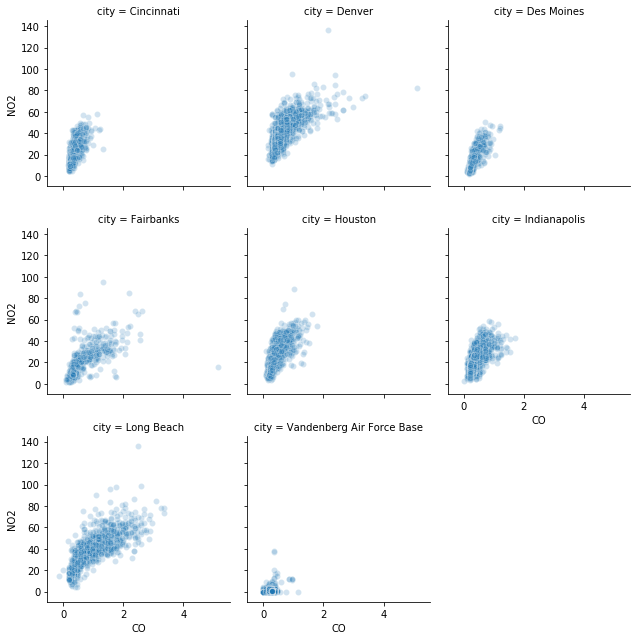

In [3]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

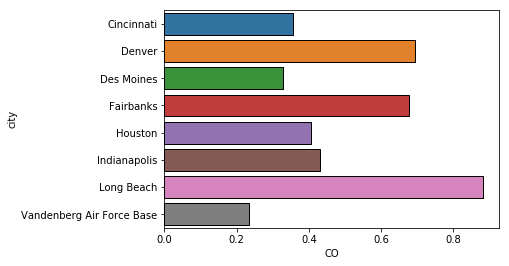

In [5]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black')
plt.show()

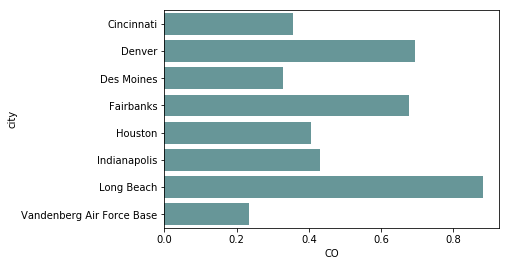

In [7]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue')
plt.show()

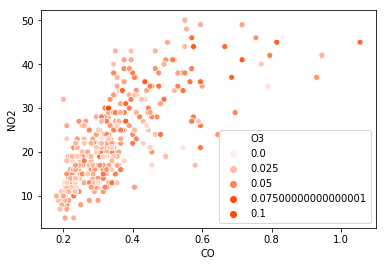

In [10]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

In [76]:
# Filter the data
nov_2015 = pollution.query("month  ==  11 & year  ==  2015")
nov_2015['day'] = nov_2015['day'] - 305
nov_2015_co = pd.pivot_table(nov_2015, values='CO', index='city', columns='day')
nov_2015_co_mean = nov_2015_co.mean(axis=1)
nov_2015_co_std = nov_2015_co.std(axis=1)
nov_2015_CO = ((nov_2015_co.unstack() - nov_2015_co_mean)/nov_2015_co_std).unstack().T

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


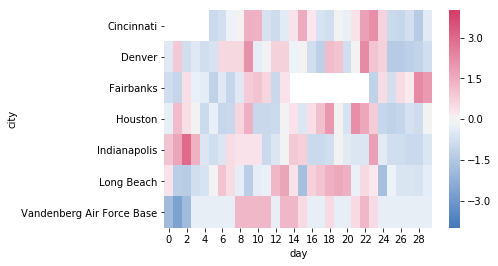

In [70]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

In [89]:
# Filter the data
oct_2015 = pollution.query("month  ==  10 & year  ==  2015")
oct_2015['day'] = oct_2015['day'] - 305 + 31
oct_2015_o3 = pd.pivot_table(oct_2015, values='O3', index='city', columns='day')
oct_2015_o3_mean = oct_2015_o3.mean(axis=1)
oct_2015_o3_std = oct_2015_o3.std(axis=1)
oct_2015_O3 = ((oct_2015_o3.unstack() - oct_2015_o3_mean)/oct_2015_o3_std).unstack().T

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


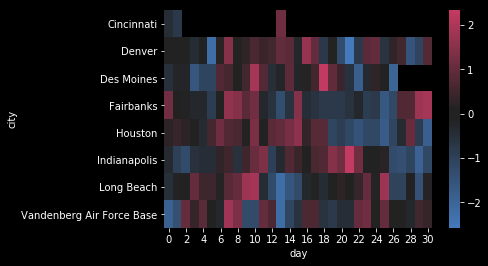

In [90]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_O3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

In [93]:
plt.style.use('seaborn')

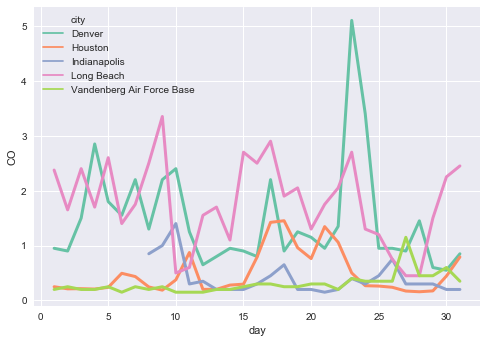

In [94]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [99]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
city     8888 non-null object
year     8888 non-null int64
month    8888 non-null int64
day      8888 non-null int64
CO       8888 non-null float64
NO2      8888 non-null float64
O3       8888 non-null float64
SO2      8888 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


In [112]:
df_str = ',city_pol,month,value\n0,Cincinnati CO,2,-0.4707910917485493\n1,Cincinnati CO,3,-0.37174429072594417\n2,Cincinnati CO,4,-0.5557776119015706\n3,Cincinnati CO,5,-0.4964322446845753\n4,Cincinnati CO,6,-0.642432351643201\n5,Cincinnati CO,7,-0.4794909465923698\n6,Cincinnati CO,8,-0.4281588133729876\n7,Cincinnati CO,9,-0.3761659695280092\n8,Cincinnati CO,10,0.03078095194485559\n9,Cincinnati CO,11,-0.3798422312140184\n10,Cincinnati CO,12,-0.4479801321408675\n11,Denver CO,1,3.0990194494241656\n12,Denver CO,2,0.9673201123363842\n13,Denver CO,3,0.6950492501402271\n14,Denver CO,4,0.265079104560055\n15,Denver CO,5,0.11116089550848805\n16,Denver CO,6,-0.002762818277711278\n17,Denver CO,7,0.008926677405910625\n18,Denver CO,8,0.318952432493268\n19,Denver CO,9,0.3187641958477995\n20,Denver CO,10,0.7712850915551508\n21,Denver CO,11,1.4508193816980544\n22,Denver CO,12,1.3483991738065173\n23,Des Moines CO,4,-0.7562651688492518\n24,Des Moines CO,5,-0.6325216922592608\n25,Des Moines CO,6,-0.5384466639532445\n26,Des Moines CO,7,-0.658391054446058\n27,Des Moines CO,8,-0.5441389401122253\n28,Des Moines CO,9,-0.5152862153313909\n29,Des Moines CO,10,-0.4951192940824294\n30,Houston CO,1,0.04559611712648895\n31,Houston CO,2,-0.12025314073259684\n32,Houston CO,3,-0.10247929884843211\n33,Houston CO,4,-0.5692484850795878\n34,Houston CO,5,-0.5791311913216759\n35,Houston CO,6,-0.6372855852827889\n36,Houston CO,7,-0.5441516460857946\n37,Houston CO,8,-0.40162874056059394\n38,Houston CO,9,-0.2801367624870572\n39,Houston CO,10,0.08564534581646228\n40,Houston CO,11,-0.3881925970436663\n41,Houston CO,12,0.3377318614284777\n42,Indianapolis CO,1,-0.23778097606182996\n43,Indianapolis CO,2,-0.409979497343275\n44,Indianapolis CO,3,-0.13846261599627618\n45,Indianapolis CO,4,-0.13405787849230277\n46,Indianapolis CO,5,-0.20453367855587712\n47,Indianapolis CO,6,-0.26788829159379624\n48,Indianapolis CO,7,-0.40782925566234146\n49,Indianapolis CO,8,-0.298557882967617\n50,Indianapolis CO,9,-0.23384212425539283\n51,Indianapolis CO,10,0.21222225451237445\n52,Indianapolis CO,11,-0.2543060439853908\n53,Indianapolis CO,12,-0.550700869573273\n54,Long Beach CO,1,4.097708971959672\n55,Long Beach CO,2,2.503472316847104\n56,Long Beach CO,3,0.4307649999018237\n57,Long Beach CO,4,-0.13405787849230297\n58,Long Beach CO,5,-0.19436889970055407\n59,Long Beach CO,6,-0.5069358495017428\n60,Long Beach CO,7,-0.41545283980383396\n61,Long Beach CO,8,-0.3620877508133872\n62,Long Beach CO,9,0.25982730215147193\n63,Long Beach CO,10,1.7775981982321487\n64,Long Beach CO,11,2.764937051045877\n65,Long Beach CO,12,3.5690463531601297\n66,Vandenberg Air Force Base CO,1,-0.5755481067751744\n67,Vandenberg Air Force Base CO,2,-0.8839402366893551\n68,Vandenberg Air Force Base CO,3,-0.4332412028006493\n69,Vandenberg Air Force Base CO,4,-0.717007945845089\n70,Vandenberg Air Force Base CO,5,-0.590795275058159\n71,Vandenberg Air Force Base CO,6,-0.8588066108768474\n72,Vandenberg Air Force Base CO,7,-0.7127726213220377\n73,Vandenberg Air Force Base CO,8,-0.772443637935694\n74,Vandenberg Air Force Base CO,9,-0.4964322446845757\n75,Vandenberg Air Force Base CO,10,-0.7747777723395093\n76,Vandenberg Air Force Base CO,11,-0.6697417241678362\n77,Vandenberg Air Force Base CO,12,-0.8195027993029311\n78,Cincinnati NO2,2,0.0832512366332626\n79,Cincinnati NO2,3,0.2869577041714\n80,Cincinnati NO2,4,0.008641226308085889\n81,Cincinnati NO2,5,-0.2951888917841736\n82,Cincinnati NO2,6,-0.38923154738415877\n83,Cincinnati NO2,7,-0.07241125271191785\n84,Cincinnati NO2,8,-0.07241125271191785\n85,Cincinnati NO2,9,0.12679738334396456\n86,Cincinnati NO2,10,0.26828918693070813\n87,Cincinnati NO2,11,0.04240012831833683\n88,Cincinnati NO2,12,-0.02573995961018832\n89,Denver NO2,1,2.1561429928956697\n90,Denver NO2,2,1.4979944185664578\n91,Denver NO2,3,1.4724085489553314\n92,Denver NO2,4,1.0045288356104922\n93,Denver NO2,5,0.6483909682496021\n94,Denver NO2,6,0.6765852160823391\n95,Denver NO2,7,0.9636914541464789\n96,Denver NO2,8,1.1405756550020345\n97,Denver NO2,9,1.0184610808845649\n98,Denver NO2,10,1.4180364924918165\n99,Denver NO2,11,1.79759510505766\n100,Denver NO2,12,1.9940970445365953\n101,Des Moines NO2,4,-0.8975742995295912\n102,Des Moines NO2,5,-0.6072642716577388\n103,Des Moines NO2,6,-0.6110757605943803\n104,Des Moines NO2,7,-0.7384106052735989\n105,Des Moines NO2,8,-0.5486917988150681\n106,Des Moines NO2,9,-0.5855154490723328\n107,Des Moines NO2,10,-0.5722530232825913\n108,Houston NO2,1,0.4205542806751007\n109,Houston NO2,2,0.5722943223720988\n110,Houston NO2,3,0.6355922636413197\n111,Houston NO2,4,-0.10650074304830627\n112,Houston NO2,5,-0.3076345699446351\n113,Houston NO2,6,-0.5868416916513067\n114,Houston NO2,7,-0.3416462747925202\n115,Houston NO2,8,-0.27239774365282865\n116,Houston NO2,9,-0.11457876602933022\n117,Houston NO2,10,0.5215976302403453\n118,Houston NO2,11,0.24555637791574056\n119,Houston NO2,12,0.4041026498567416\n120,Indianapolis NO2,1,-0.22164271240469816\n121,Indianapolis NO2,2,-0.07974403087809329\n122,Indianapolis NO2,3,0.12687516883246713\n123,Indianapolis NO2,4,0.058435606773206666\n124,Indianapolis NO2,5,-0.4341137742503218\n125,Indianapolis NO2,6,-0.39413739767628875\n126,Indianapolis NO2,7,-0.3582729229600116\n127,Indianapolis NO2,8,-0.18220546973373708\n128,Indianapolis NO2,9,-0.2959122968272508\n129,Indianapolis NO2,10,-0.11231520831389634\n130,Indianapolis NO2,11,-0.09355012977713242\n131,Indianapolis NO2,12,0.34381889626700685\n132,Long Beach NO2,1,2.002827795056488\n133,Long Beach NO2,2,1.5682680513224905\n134,Long Beach NO2,3,0.572936052652248\n135,Long Beach NO2,4,-0.01342262750575675\n136,Long Beach NO2,5,-0.14463507878684398\n137,Long Beach NO2,6,-0.34004000445493554\n138,Long Beach NO2,7,-0.22175939063745265\n139,Long Beach NO2,8,0.011130361940178439\n140,Long Beach NO2,9,0.6358333986556785\n141,Long Beach NO2,10,1.0646271007276422\n142,Long Beach NO2,11,1.696345191806281\n143,Long Beach NO2,12,2.0325677801607576\n144,Vandenberg Air Force Base NO2,1,-1.4958856923146702\n145,Vandenberg Air Force Base NO2,2,-1.6152308561033786\n146,Vandenberg Air Force Base NO2,3,-1.603229666448648\n147,Vandenberg Air Force Base NO2,4,-1.6696584736301097\n148,Vandenberg Air Force Base NO2,5,-1.6639023474808965\n149,Vandenberg Air Force Base NO2,6,-1.6889492747788248\n150,Vandenberg Air Force Base NO2,7,-1.6849044293766748\n151,Vandenberg Air Force Base NO2,8,-1.7028815200528966\n152,Vandenberg Air Force Base NO2,9,-1.6551903727685737\n153,Vandenberg Air Force Base NO2,10,-1.616608770471144\n154,Vandenberg Air Force Base NO2,11,-1.5490909664506418\n155,Vandenberg Air Force Base NO2,12,-1.5355562914511403\n156,Cincinnati O3,2,-0.5302005825549049\n157,Cincinnati O3,3,0.09096772388299668\n158,Cincinnati O3,4,0.9662058830553353\n159,Cincinnati O3,5,0.9330727152929087\n160,Cincinnati O3,6,1.6583209429815762\n161,Cincinnati O3,7,0.8391360281958496\n162,Cincinnati O3,8,1.3842300784809303\n163,Cincinnati O3,9,0.8079029704126317\n164,Cincinnati O3,10,-1.095413444384532\n165,Cincinnati O3,11,-1.4488339005170805\n166,Cincinnati O3,12,-1.5656906642383268\n167,Denver O3,1,-1.8043919803762378\n168,Denver O3,2,-1.1348576917207538\n169,Denver O3,3,-0.5396312754664105\n170,Denver O3,4,-0.1087813376811667\n171,Denver O3,5,0.633458258090796\n172,Denver O3,6,1.2496785405783173\n173,Denver O3,7,2.0077036654083087\n174,Denver O3,8,1.6229313946188413\n175,Denver O3,9,0.31990458596109195\n176,Denver O3,10,-1.2379216928250754\n177,Denver O3,11,-1.7417147414787766\n178,Denver O3,12,-1.6323992667410983\n179,Des Moines O3,4,0.9443471959898442\n180,Des Moines O3,5,0.6770328955947316\n181,Des Moines O3,6,0.48393421895779354\n182,Des Moines O3,7,0.7678819039755773\n183,Des Moines O3,8,0.8925766213610532\n184,Des Moines O3,9,0.3348349640268764\n185,Des Moines O3,10,-1.0585988135373918\n186,Houston O3,1,-1.1417286251277101\n187,Houston O3,2,-0.3972502665334038\n188,Houston O3,3,0.5826211810028715\n189,Houston O3,4,0.2556835077055239\n190,Houston O3,5,-0.08182352735116437\n191,Houston O3,6,-0.4916534984914293\n192,Houston O3,7,-0.0711354087181244\n193,Houston O3,8,0.3920163987136433\n194,Houston O3,9,0.05320303804624972\n195,Houston O3,10,-0.4363127953470177\n196,Houston O3,11,-1.0898912497574624\n197,Houston O3,12,-1.8845528701240442\n198,Indianapolis O3,1,-1.5463926722620036\n199,Indianapolis O3,2,-0.7938166609060341\n200,Indianapolis O3,3,0.19606755710789597\n201,Indianapolis O3,4,0.6569629839393563\n202,Indianapolis O3,5,0.7696632570810845\n203,Indianapolis O3,6,1.3857657277098165\n204,Indianapolis O3,7,0.9477985676317647\n205,Indianapolis O3,8,1.5694908014536368\n206,Indianapolis O3,9,1.1521197688333942\n207,Indianapolis O3,10,-0.7640817667602677\n208,Indianapolis O3,11,-1.2629834882404811\n209,Indianapolis O3,12,-1.4083378065852263\n210,Long Beach O3,1,-1.9237426384451934\n211,Long Beach O3,2,-0.7285819441576673\n212,Long Beach O3,3,0.3367944524429333\n213,Long Beach O3,4,0.7784512657349187\n214,Long Beach O3,5,0.8747630903059853\n215,Long Beach O3,6,0.3017017962644498\n216,Long Beach O3,7,-0.3258689028055961\n217,Long Beach O3,8,0.1764726729473209\n218,Long Beach O3,9,0.45080105119536845\n219,Long Beach O3,10,-0.016461571095260273\n220,Long Beach O3,11,-1.1064578336386741\n221,Long Beach O3,12,-1.6271803343987834\n222,Vandenberg Air Force Base O3,1,0.5398687064707094\n223,Vandenberg Air Force Base O3,2,0.8965210460946769\n224,Vandenberg Air Force Base O3,3,0.8141970847187546\n225,Vandenberg Air Force Base O3,4,0.9772502723094785\n226,Vandenberg Air Force Base O3,5,0.693065073544293\n227,Vandenberg Air Force Base O3,6,-0.6352305587952748\n228,Vandenberg Air Force Base O3,7,-0.5111296257783012\n229,Vandenberg Air Force Base O3,8,-1.0013316099973946\n230,Vandenberg Air Force Base O3,9,-0.042515002156313444\n231,Vandenberg Air Force Base O3,10,0.8852136951916267\n232,Vandenberg Air Force Base O3,11,0.4176678834329418\n233,Vandenberg Air Force Base O3,12,0.4686145822504371\n234,Cincinnati SO2,2,0.6019725607455033\n235,Cincinnati SO2,3,1.6228000422132363\n236,Cincinnati SO2,4,0.05318900590063382\n237,Cincinnati SO2,5,-0.08786821167585077\n238,Cincinnati SO2,6,1.2377297366332802\n239,Cincinnati SO2,7,1.8065910728876102\n240,Cincinnati SO2,8,2.2366703079779806\n241,Cincinnati SO2,9,0.5379669735354794\n242,Cincinnati SO2,10,0.8592654919619779\n243,Cincinnati SO2,11,0.5982986750290361\n244,Cincinnati SO2,12,1.651992801000442\n245,Denver SO2,1,1.51384115378212\n246,Denver SO2,2,0.577631728994272\n247,Denver SO2,3,0.2120908112428181\n248,Denver SO2,4,-0.18601344438720033\n249,Denver SO2,5,0.4900545822085277\n250,Denver SO2,6,0.8931592443003628\n251,Denver SO2,7,0.31776037474016544\n252,Denver SO2,8,0.587485019309269\n253,Denver SO2,9,0.5373532707816329\n254,Denver SO2,10,0.9369757935222847\n255,Denver SO2,11,1.0717467456697867\n256,Denver SO2,12,0.5333812953986458\n257,Des Moines SO2,4,-1.12943980471426\n258,Des Moines SO2,5,-1.1636693423062994\n259,Des Moines SO2,6,-1.1836108747172773\n260,Des Moines SO2,7,-1.1801159669751473\n261,Des Moines SO2,8,-1.1517455394213847\n262,Des Moines SO2,9,-1.1615175755787919\n263,Des Moines SO2,10,-1.1415486321266992\n264,Houston SO2,1,-0.6597858790144754\n265,Houston SO2,2,-0.7140523981785173\n266,Houston SO2,3,-0.9665154290884865\n267,Houston SO2,4,-0.9240146098400724\n268,Houston SO2,5,-0.7753234173131309\n269,Houston SO2,6,-0.45708122997092626\n270,Houston SO2,7,-0.4714720265561683\n271,Houston SO2,8,-0.861668196824582\n272,Houston SO2,9,-0.6576204067664104\n273,Houston SO2,10,-0.655879805655624\n274,Houston SO2,11,-0.21724147297717494\n275,Houston SO2,12,0.07167775313252991\n276,Indianapolis SO2,1,2.4543482382304598\n277,Indianapolis SO2,2,1.436700158460351\n278,Indianapolis SO2,3,-0.2848028365647459\n279,Indianapolis SO2,4,0.24161935528367798\n280,Indianapolis SO2,5,0.53650048283584\n281,Indianapolis SO2,6,0.7063331497287657\n282,Indianapolis SO2,7,0.22442577974445357\n283,Indianapolis SO2,8,0.7340655616703745\n284,Indianapolis SO2,9,0.4636145245117299\n285,Indianapolis SO2,10,2.1749954654698\n286,Indianapolis SO2,11,1.7328364681226567\n287,Indianapolis SO2,12,2.9333904455120434\n288,Long Beach SO2,1,-0.3606628928498064\n289,Long Beach SO2,2,-0.24494914071541296\n290,Long Beach SO2,3,-0.8123283228180385\n291,Long Beach SO2,4,-0.973936968470304\n292,Long Beach SO2,5,-0.9402008296183301\n293,Long Beach SO2,6,-0.9240146098400724\n294,Long Beach SO2,7,-0.6601970446311966\n295,Long Beach SO2,8,-0.6057176004156383\n296,Long Beach SO2,9,-0.4131070672625945\n297,Long Beach SO2,10,-0.49384892454310997\n298,Long Beach SO2,11,-0.45240764746086204\n299,Long Beach SO2,12,-0.39028204560990704\n300,Vandenberg Air Force Base SO2,1,-0.7150876544634761\n301,Vandenberg Air Force Base SO2,2,-0.7538840672983831\n302,Vandenberg Air Force Base SO2,3,-0.7747066688880492\n303,Vandenberg Air Force Base SO2,4,-0.7625635776742167\n304,Vandenberg Air Force Base SO2,5,-0.7578488786024802\n305,Vandenberg Air Force Base SO2,6,-0.7765843252044095\n306,Vandenberg Air Force Base SO2,7,-0.7841634780726368\n307,Vandenberg Air Force Base SO2,8,-0.7415088524268565\n308,Vandenberg Air Force Base SO2,9,-0.8594341969737302\n309,Vandenberg Air Force Base SO2,10,-0.8046258202647949\n310,Vandenberg Air Force Base SO2,11,-0.7897553304600451\n311,Vandenberg Air Force Base SO2,12,-0.765661025320183\n'
city_pol_month = pd.read_csv(StringIO(df_str), index_col=0)
city_pol_month

,city_pol,month,value
0,Cincinnati CO,2,-0.470791
1,Cincinnati CO,3,-0.371744
2,Cincinnati CO,4,-0.555778
3,Cincinnati CO,5,-0.496432
4,Cincinnati CO,6,-0.642432
5,Cincinnati CO,7,-0.479491
6,Cincinnati CO,8,-0.428159
7,Cincinnati CO,9,-0.376166
8,Cincinnati CO,10,0.030781
9,Cincinnati CO,11,-0.379842


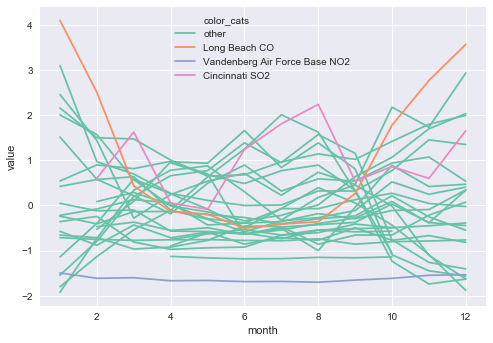

In [113]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

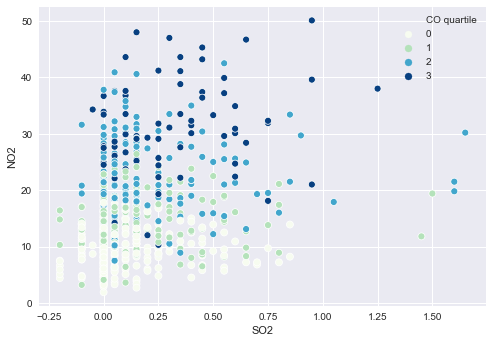

In [115]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

In [116]:
df_str = ',city,year,pollutant,state,value,month,day\n0,Cincinnati,2012,CO,Ohio,1.1949999999999998,2,60\n1,Cincinnati,2012,NO2,Ohio,43.0,2,60\n2,Cincinnati,2012,O3,Ohio,0.04,2,60\n3,Cincinnati,2012,SO2,Ohio,102.35,2,60\n4,Cincinnati,2013,CO,Ohio,1.32,12,365\n5,Cincinnati,2013,NO2,Ohio,58.0,12,365\n6,Cincinnati,2013,O3,Ohio,0.07400000000000001,12,365\n7,Cincinnati,2013,SO2,Ohio,82.9,12,365\n8,Cincinnati,2014,CO,Ohio,1.0550000000000002,12,365\n9,Cincinnati,2014,NO2,Ohio,50.0,12,365\n10,Cincinnati,2014,O3,Ohio,0.078,12,365\n11,Cincinnati,2014,SO2,Ohio,90.35,12,365\n12,Cincinnati,2015,CO,Ohio,1.008,12,365\n13,Cincinnati,2015,NO2,Ohio,57.0,12,365\n14,Cincinnati,2015,O3,Ohio,0.075,12,365\n15,Cincinnati,2015,SO2,Ohio,40.3,12,365\n16,Denver,2012,CO,Colorado,3.3,12,366\n17,Denver,2012,NO2,Colorado,85.0,12,366\n18,Denver,2012,O3,Colorado,0.07566666666666666,12,366\n19,Denver,2012,SO2,Colorado,37.0,12,366\n20,Denver,2013,CO,Colorado,5.1,12,365\n21,Denver,2013,NO2,Colorado,82.0,12,365\n22,Denver,2013,O3,Colorado,0.07400000000000001,12,365\n23,Denver,2013,SO2,Colorado,44.15,12,365\n24,Denver,2014,CO,Colorado,2.6500000000000004,12,365\n25,Denver,2014,NO2,Colorado,136.4,12,365\n26,Denver,2014,O3,Colorado,0.068,12,365\n27,Denver,2014,SO2,Colorado,13.3,12,365\n28,Denver,2015,CO,Colorado,2.45,12,365\n29,Denver,2015,NO2,Colorado,94.9,12,365\n30,Denver,2015,O3,Colorado,0.077,12,365\n31,Denver,2015,SO2,Colorado,17.3,12,365\n32,Des Moines,2012,CO,Iowa,1.2255,10,305\n33,Des Moines,2012,NO2,Iowa,50.1,10,305\n34,Des Moines,2012,O3,Iowa,0.07,10,305\n35,Des Moines,2012,SO2,Iowa,1.6,10,305\n36,Des Moines,2013,CO,Iowa,0.8059999999999999,10,304\n37,Des Moines,2013,NO2,Iowa,43.6,10,304\n38,Des Moines,2013,O3,Iowa,0.0625,10,304\n39,Des Moines,2013,SO2,Iowa,0.95,10,304\n40,Des Moines,2014,CO,Iowa,1.0550000000000002,10,304\n41,Des Moines,2014,NO2,Iowa,47.0,10,304\n42,Des Moines,2014,O3,Iowa,0.068,10,304\n43,Des Moines,2014,SO2,Iowa,1.05,10,304\n44,Des Moines,2015,CO,Iowa,0.8945,10,300\n45,Des Moines,2015,NO2,Iowa,41.1,10,300\n46,Des Moines,2015,O3,Iowa,0.065,10,300\n47,Des Moines,2015,SO2,Iowa,1.65,10,300\n48,Fairbanks,2014,CO,Alaska,2.23,12,365\n49,Fairbanks,2014,NO2,Alaska,95.1,12,365\n50,Fairbanks,2014,O3,Alaska,0.035,12,365\n51,Fairbanks,2014,SO2,Alaska,30.05,12,365\n52,Fairbanks,2015,CO,Alaska,5.17,12,365\n53,Fairbanks,2015,NO2,Alaska,84.9,12,365\n54,Fairbanks,2015,O3,Alaska,0.051,12,365\n55,Fairbanks,2015,SO2,Alaska,49.0,12,365\n56,Houston,2012,CO,Texas,1.40825,12,366\n57,Houston,2012,NO2,Texas,59.85,12,366\n58,Houston,2012,O3,Texas,0.10800000000000001,12,366\n59,Houston,2012,SO2,Texas,21.325,12,366\n60,Houston,2013,CO,Texas,1.7875,12,365\n61,Houston,2013,NO2,Texas,65.05,12,365\n62,Houston,2013,O3,Texas,0.08199999999999999,12,365\n63,Houston,2013,SO2,Texas,34.7,12,365\n64,Houston,2014,CO,Texas,1.51875,12,365\n65,Houston,2014,NO2,Texas,59.75,12,365\n66,Houston,2014,O3,Texas,0.068,12,365\n67,Houston,2014,SO2,Texas,21.675,12,365\n68,Houston,2015,CO,Texas,1.32,12,365\n69,Houston,2015,NO2,Texas,88.3,12,365\n70,Houston,2015,O3,Texas,0.092,12,365\n71,Houston,2015,SO2,Texas,7.300000000000002,12,365\n72,Indianapolis,2012,CO,Indiana,1.25,9,274\n73,Indianapolis,2012,NO2,Indiana,49.2,9,274\n74,Indianapolis,2012,O3,Indiana,0.09300000000000001,9,274\n75,Indianapolis,2012,SO2,Indiana,145.0,9,274\n76,Indianapolis,2013,CO,Indiana,1.55,12,365\n77,Indianapolis,2013,NO2,Indiana,47.8,12,365\n78,Indianapolis,2013,O3,Indiana,0.0725,12,365\n79,Indianapolis,2013,SO2,Indiana,81.15,12,365\n80,Indianapolis,2014,CO,Indiana,1.15,12,355\n81,Indianapolis,2014,NO2,Indiana,57.5,12,355\n82,Indianapolis,2014,O3,Indiana,0.07200000000000001,12,355\n83,Indianapolis,2014,SO2,Indiana,66.95,12,355\n84,Indianapolis,2015,CO,Indiana,1.7000000000000002,12,365\n85,Indianapolis,2015,NO2,Indiana,59.0,12,365\n86,Indianapolis,2015,O3,Indiana,0.071,12,365\n87,Indianapolis,2015,SO2,Indiana,64.45,12,365\n88,Long Beach,2012,CO,California,3.35,12,366\n89,Long Beach,2012,NO2,California,97.8,12,366\n90,Long Beach,2012,O3,California,0.066,12,366\n91,Long Beach,2012,SO2,California,17.05,12,366\n92,Long Beach,2013,CO,California,3.35,12,365\n93,Long Beach,2013,NO2,California,81.2,12,365\n94,Long Beach,2013,O3,California,0.0675,12,365\n95,Long Beach,2013,SO2,California,10.15,12,365\n96,Long Beach,2014,CO,California,3.1,12,365\n97,Long Beach,2014,NO2,California,135.9,12,365\n98,Long Beach,2014,O3,California,0.07200000000000001,12,365\n99,Long Beach,2014,SO2,California,12.15,12,365\n100,Long Beach,2015,CO,California,2.75,12,365\n101,Long Beach,2015,NO2,California,74.8,12,365\n102,Long Beach,2015,O3,California,0.066,12,365\n103,Long Beach,2015,SO2,California,26.1,12,365\n104,Vandenberg Air Force Base,2012,CO,California,0.45,12,366\n105,Vandenberg Air Force Base,2012,NO2,California,13.0,12,366\n106,Vandenberg Air Force Base,2012,O3,California,0.062,12,366\n107,Vandenberg Air Force Base,2012,SO2,California,3.8,12,366\n108,Vandenberg Air Force Base,2013,CO,California,1.15,12,365\n109,Vandenberg Air Force Base,2013,NO2,California,17.0,12,365\n110,Vandenberg Air Force Base,2013,O3,California,0.071,12,365\n111,Vandenberg Air Force Base,2013,SO2,California,2.5,12,365\n112,Vandenberg Air Force Base,2014,CO,California,0.95,12,365\n113,Vandenberg Air Force Base,2014,NO2,California,38.0,12,365\n114,Vandenberg Air Force Base,2014,O3,California,0.071,12,365\n115,Vandenberg Air Force Base,2014,SO2,California,10.0,12,365\n116,Vandenberg Air Force Base,2015,CO,California,0.4,12,365\n117,Vandenberg Air Force Base,2015,NO2,California,8.0,12,365\n118,Vandenberg Air Force Base,2015,O3,California,0.061,12,365\n119,Vandenberg Air Force Base,2015,SO2,California,2.0,12,365\n'
max_pollutant_values = pd.read_csv(StringIO(df_str), index_col=0)

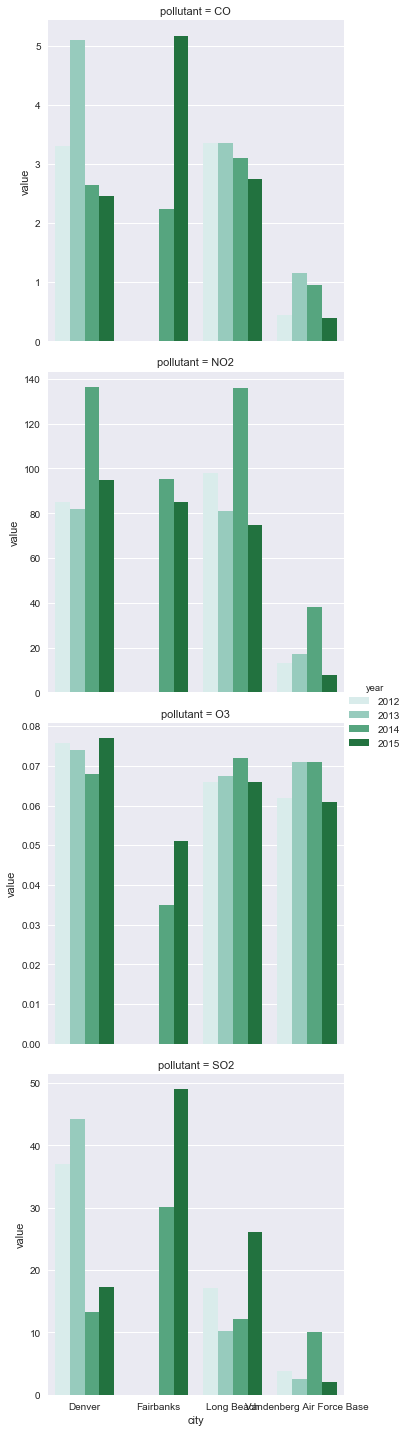

In [118]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          ]

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()